# MIMIC-III (EHR) for Descriptive Health Analytics
> In this article we will look at the basic structure of the MIMIC-III database, which is the largest publicly Electronic Health Record (EHR) database available to benchmark machine learning algorithms. In particular, we will learn about the design of this relational database, and what tools are available to query, extract and visualise descriptive analytics.

- toc: true 
- comments: true
- image: images/ehr3.jpg
- categories: [health, electronic-health-records]

## Introduction

In an [earlier article we looked at how the MIMIC-III EHR database come into being](https://livingdatalab.com/health/2022/03/14/data-ehr-healthcare.html). In this article, we're going to overview the main architecture of the MIMIC-III Electronic Health Record (EHR) database and how it links information between ICU units in the hospital records. We're also going to highlight that a key processing step to develop the database was to remove any sensitive fields. When dealing with sensitive health data, we need to particularly pay attention to dates. With MIMIC to protect anonymity, all dates have been shifted relatively to protect the privacy of the subjects. In particular, we will learn about the design of this relational database, and what tools are available to query, extract and visualise descriptive analytics.

## MIMIC-III use cases

Electronic health records are complicated. This is for several reasons. Some of this information can be medical images, lab tests, natural language diagnosis from doctors, medications, and hospitalization events. During hospitalization there is a number of tests a patient undergoes, blood test, and vital signs checked. It could be medical images and so on. A single patients data are spread over multiple electronic health record with diverse representation. Another important issue is the meaning of measurements. As simple temperature measure may vary depending on whether it is taking from the mouth or the armpit. Putting all this together, we see that electronic health records are irregularly sampled. Their nature is varied and dynamic. So how we can design the schema of a database to encode this information?

This database should be accessible simultaneously from doctors and other health care providers frequently and in a unified way. Interoperability is a key requirement. This involve enhanced quality, efficiency, and effectiveness of the health care system. Information should be provided in the appropriate format whenever is needed. We should eliminate unnecessary duplications. Database selection and it's matching schema architecture usually influences that effective management of medical data flexibility, scalability, query performance, and interoperability. Non-proprietary standardized models are necessary to build electronic health record systems which comply the requirement of interoperability.

MIMIC-III is a good example towards this direction. It is the only freely accessible critical care database of its kind. The dataset spans more than a decade, which detailed information about individual patient care. Databases such as MIMIC-III play a key role in accelerating research in machine learning models and end enabling reproducibility studies. MIMIC-III database links the identified information across five intensive units at the hospital of Medical Center in Boston with the hospital electronic health record databases.

![](https://github.com/pranath/blog/raw/master/images/mimic3-patient-timeline.png "MIMIC III - Patient Timeline")

During ICU stay, there are several signals that are monitored and these are the vital signs, there are waveforms. We have alarms, but there are also fluids and medications as well as progression reports noted from the doctors. On the other hand, data recording from the hospital will include billing details and it includes also International Classification of Disease codes which relates to the pathology and the symptoms of the patient during admission. It will include demographics of the patient, and it will also include other nodes, with relation to medical images, discharge summaries, and so on. All the fields related to patient data identification has been removed. This includes his patient name, telephone number, and addresses. In particular dates, we're shifted into the future by a random offset for each individual patient in a consistent manner. Preserving interval is important. Therefore, dates cannot be completely removed or randomly changed.

![](https://github.com/pranath/blog/raw/master/images/mimic3-overview.jpg "MIMIC III - Overview")

## MIMIC-III as a Relational Database

MIMIC-III database consists of 26 tables and they're all listed below. The schema of the database reflects the inherent hospital sources of information. Since MIMIC-III links data from a hospital, the overall structure represents closely this row data. As we see here, MIMIC-III tables can be categorized in four groups.

One of the group is the **patient tracking**. These tables are used to define and track patient stay. The tables under **ICU data** include all the data recorded during icu stays. On the other hand, the data recorded within the table under the **hospital category** includes all the data recorded in the hospital. Recall that the database links data between the ICU unit and the hospital but these are two different entities. Finally, the last category includes **dictionary tables** and they all have a prefix of d.

![](https://github.com/pranath/blog/raw/master/images/mimic3-tables.png "MIMIC III - Overview")

Here, we're going to look at the basic tables of MIMIC-III, which are the *patients* table, the *admission* table, and the *icustays* table. Several key summary statistics can be extracted based only on these tables.

The **patient table** has a subject Id identifier that can link it to the admission table, as well as the ICU table. The patient table includes the date of birth. *We should pay attention here because the date of birth has been shifted for patients older than 89 years old*. We should also note that the table records three different versions of date of death. These are the date of death according to the hospital. The date of death from Social Security database, and a date of death which matches the two dates and gives priority to the date of death at hospital. The patient's table also includes an expired flag, which is a binary flag that records whether the patient has died according to either database.

The **admissions table** has an additional identifier. The hospital admission identify that links the information with the icustays table. *The admissions table records every unique hospitalization for each patient in the database*. It includes information about admission time, discharge time, death time, type of admission, hospital expiry flag, diagnosis, and whether the patient has chart events data associated with his record.

The **icustays table** records every unique ICU stay in the database. The icustay identifier is a generated identifier that is not based on any row data identifier. We should point out that the hospital and the ICU database are not mainly linked, they used to be two separate databases. Therefore they don't have any concept of an ICU and counter identifier. Taking all this together, subject Id refers to a unique patient identifier, hospital admission Id refers to a unique admission to the hospital and icustay identification refers to a unique admission to an intensive care unit.

Information in the icustays table include the first care unit and the last care unit, which are also information defined in the **transfers table**. It also include the first ward and the last ward, which refers to the physical locations within the hospital. It includes in time and out time of when the patient was transferred in and out of the ICU. It also includes length of stay for the patient. We should point out that the icustays table have been in fact linked with the transfers table. Specifically it groups a transfers stable based on icustay ID and excludes rows where there is no icustay ID. The transfers table, includes additional information of patient movement from bed to bed within the hospital, including ICU admission and discharge.

Finally, the **callout table** includes information regarding when a patient was cleared from ICU discharge and when the patient was actually discharged. A key table that includes data from the ICU unit is the **chart events table**. Here we can find all chart event observations for patients. The **outputevents stable**, on the other hand, contains all measurements related to output for a given patient. When we work with ICU data and in particular with chart events data, we should consider also the **dictionary tables**. This table provide definitions for identifiers. For example, every row of chart events is associated with a single item ID, which represents the concept measure. In this way, by joining the chart events table with a dictionary items table it is possible to identify the concept represented by a given item ID. The rest of the dictionary's table, they're also used for cross-referencing codes against their respective definitions.

Now we highlight some of the tables and the hospital data that are used very often, in particular, the **lab events table** containing laboratory test results for a patient. There is some duplication between chart events and lab events. In cases where there is a disagreement between measurements, lab events should be taken as the ground truth. In some cases, it would have been possible to merge tables. For example, we can merge the dictionary of ICT procedures with that CPT events table because both contain details relating to procedures and they could be combined. However, since the data sources are significantly different, they have been kept separately.

Researchers are advised to develop database views and transform them as appropriately rather than combining the tables within the mimic data model. We should also point out that the patients' procedures recording in the **procedures ICT table** are coded using the International Statistical Classification of Diseases. Similarly, the **diagnosis ICT table**, are hospital assigned diagnosis coded using again, the International Statistical Classification of Diseases System. The corresponding dictionary tables, they hold the relative information with relation to the ICD-9 codes.

Summarizing, the mimic database holds more than 53,000 distinct hospital admissions for patients age 60 years and above, and they were admitted to critical care between 2001 and 2012. To correctly extract information from an electronic health record database, we need to understand the schema of the database, but also the source of the data. In almost every query, we will see that we can use SQL queries to join information between the basic tables which hold data for the patients' admissions in the hospital and ICU stays. In the next sectionss, we will see how to extract information about the patient characteristics such as age, gender, ICU units, as well as outcomes such as mortality and stay of length. We are also going to discuss the coding system used in mimic, which is based on the International Classification of Diseases, ICD-9 system.

[This is a good article summerising the characteristics of the MIMIC-III database and its tables](https://www.nature.com/articles/sdata201635).

## Calculating Descriptive Statistics for MIMIC-III

Descriptive statistics are powerful. They can be used in retrospective studies to overview historic data and explain trends. Extracting patients can result in different estimations depending on which table identifier we use. Therefore, we really need to understand the schema of the database and how it encodes the data. Normally, descriptive statistics look into patient characteristics, intensive care unit utilization, and patient outcomes such as mortality. A number of factors should be considered while we extract this data, for example, when we are looking into estimating the number of patients, we will realize that there is more than one way leading to similar but not identical results. We can look into the number of distinct patients across care units. We can also look into unique hospital admissions. Some patients have been admitted more than once. Therefore, we would expect that the number of unique patient admissions is less than the number of unique hospital admissions, since a patient can be hospitalized more than once.

We can also consider unique admissions to ICUs and this number will be, again, different than the number of distinct patient across intensive care units because some patients have been admitted to more than one intensive care unit. In particular, for MIMIC-III, it is useful to know the age distribution across intensive units. Dßescriptive analytics can provide us a lot of information about historic data. They can be used to explain trends, but they cannot be used to predict future and prevent disease and high rates of mortality. Therefore, they are limited into retrospective studies.

To calculate some example descriptive statistics we will use the following tools:

- [A reduced demo version of the MIMIC-III dataset](https://physionet.org/content/mimiciii-demo/1.4/)
- A PostgreSQL Database with all the tables from the demo MIMIC-III imported into it
- Python & Pandas

In [1]:

# Import libraries
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as mc
import colorsys
import psycopg2
%matplotlib inline

# Local Database Configuration:
sqluser = 'pranath'
dbname = 'mimic'
schema_name = 'mimiciii'

In [2]:

# Connect to MIMIC-III database:
con = psycopg2.connect(dbname=dbname, user=sqluser, password='')
cur = con.cursor()

### Calculating the Distribution of Heart rates of all adult patients

Say for example we would like to create a histogram of all adult (age >= 16) patients’ heart rates. Heart rates are registered as two separate charted events, under the label ‘Heart rate’. 

To get all adult patients’ heart rates, we first combine the Patients and Admissions tables again to get the age of each patient (computed from each patient’s date of birth and hospital admission time). We filter out all patients younger than 16 years old, and select the values from the charted events related to the unique identifiers mentioned above. 

![](https://github.com/pranath/blog/raw/master/images/mimic3-sql-heartrate.png "MIMIC III - SQL Query to obtain heart rate data")

For the implementation, we will need to filter on charted events with item ID 211 or 220045, which both correspond to heart rate.

In [3]:

# Make sure that we are looking at the right item IDs that correspond to heart rate in the d_items dictionary table:
query =  """
SELECT d.itemid, d.label
FROM public.d_items d
WHERE d.label LIKE '%Heart Rate%'
"""
query_output = pd.read_sql_query(query,con)
query_output

,itemid,label
0,211,Heart Rate
1,3494,Lowest Heart Rate
2,220045,Heart Rate
3,220047,Heart Rate Alarm - Low


In [4]:

# Compose and execute SQL queries to get all adult heart rates
# First query: Join patients and admissions table to get the age which is admittime - dob, and filter all ages over 16 only, return table with just list of subject id's
# Second query: Filter from chartevents table where subject id's match those we just returned, and with heart rate item ids 211 or 220045
query = """
WITH subjects_above16 AS 
(
  SELECT a.subject_id
  FROM public.admissions a
  INNER JOIN public.patients p
  ON a.subject_id = p.subject_id
  WHERE round((EXTRACT(EPOCH FROM (a.admittime-p.dob))/60/60/24/365.242) :: NUMERIC, 4) >= 16
  group by a.subject_id
)
, heart_rate_table as
(
  SELECT width_bucket(ce.valuenum, 0, 300, 301) AS bucket
  FROM public.chartevents ce
  INNER JOIN subjects_above16
  ON ce.subject_id = subjects_above16.subject_id
  WHERE ce.itemid in (211, 220045)
)
SELECT bucket as heart_rate
FROM heart_rate_table
ORDER BY bucket;
"""

query_output = pd.read_sql_query(query,con)
query_output.head()

,heart_rate
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


<AxesSubplot:>

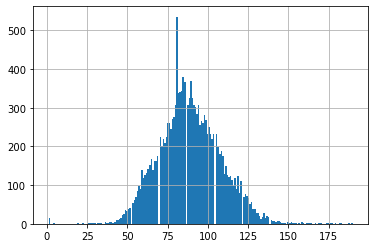

In [5]:

# Visualize distribution of heart rate:
query_output['heart_rate'].hist(bins=200)

In [6]:

# Show 5-Number summary of heart rate:
query_output['heart_rate'].describe()

count    15485.000000
mean        88.766225
std         19.175901
min          1.000000
25%         76.000000
50%         88.000000
75%        101.000000
max        190.000000
Name: heart_rate, dtype: float64

### Extract hospitalisation numbers

We will now look at the basic operations required to extract descriptive statistics from the MIMIC-III database with relation to hospitalisations, age distribution of patients, gender distribution of patients, length of stay in ICUs and mortality. They use the basic tables of MIMIC-III: Patients, Icustays and Admissions. 

#### 1. Number of distinct patients across care units 

We would like to know the number of unique adult (age >= 16) patients admitted to an intensive care unit (ICU), as well as the distribution of those patients across the different ICUs.  

The diagram below visualizes how to get the information that is needed to get those numbers. The Patients table is combined with the Icustays table to get each patient’s unique identifier and the ICU that they were admitted to. Moreover, we use each patient’s date of birth and the time of admission to compute each patient’s age, and select only adult patients (age >= 16).  

![](https://github.com/pranath/blog/raw/master/images/mimic-sql1.png "")

In [7]:

# Compose SQL query
query = """
SELECT i.subject_id, i.first_careunit
  FROM public.patients p
  INNER JOIN public.Icustays i ON i.subject_id = p.subject_id
  WHERE round((EXTRACT(EPOCH FROM (i.intime-p.dob))/60/60/24/365.242) :: NUMERIC, 4) >= 16
"""
# Run query
query_output = pd.read_sql_query(query,con)
# Filter duplicate patients and group by ICU unit
icu_units = query_output.drop_duplicates(['subject_id']).groupby(['first_careunit']).count()
icu_units = icu_units.reset_index()
# Calculate percentage
icu_units.columns = ['ICU Unit', 'Total Admissions']
sum_patients = icu_units['Total Admissions'].sum()
icu_units['Percentage Admissions'] = (icu_units['Total Admissions'] / sum_patients) * 100
print('Total Patients: ' + str(sum_patients))
icu_units.head(10)

Total Patients: 100


,ICU Unit,Total Admissions,Percentage Admissions
0,CCU,12,12.0
1,CSRU,6,6.0
2,MICU,54,54.0
3,SICU,20,20.0
4,TSICU,8,8.0


#### 2. Number of distinct hospital admissions across care units 

Some patients might have been admitted to hospital more than once. Apart from the number of unique patients, we would also like to know the number of unique hospital admissions and the corresponding distribution across ICUs.  

To get the numbers for hospital admissions, we combine the Patients table with the Icustays table based on each patient’s unique subject identifier. We collect each patient’s identifier and date of birth, and all the unique hospital stay identifiers, along with the corresponding ICU and time of admission. Again, we compute each patient’s age and select only adult patients (age >= 16). 

![](https://github.com/pranath/blog/raw/master/images/mimic-sql2.png "")

In [15]:

# Compose SQL query
query = """
SELECT i.first_careunit, i.hadm_id
  FROM public.patients p
  INNER JOIN public.Icustays i ON i.subject_id = p.subject_id
  WHERE round((EXTRACT(EPOCH FROM (i.intime-p.dob))/60/60/24/365.242) :: NUMERIC, 4) >= 16
"""
# Run query
query_output = pd.read_sql_query(query,con)
# Filter duplicate patients and group by ICU unit
icu_units = query_output.drop_duplicates(['hadm_id']).groupby(['first_careunit']).count()
icu_units = icu_units.reset_index()
# Calculate percentage
icu_units.columns = ['ICU Unit', 'Total Unique Admissions']
sum_patients = icu_units['Total Unique Admissions'].sum()
icu_units['Percentage Unique Admissions'] = (icu_units['Total Unique Admissions'] / sum_patients) * 100
print('Total Patients: ' + str(sum_patients))
icu_units.head(10)

Total Patients: 129


,ICU Unit,Total Unique Admissions,Percentage Unique Admissions
0,CCU,17,13.178295
1,CSRU,6,4.651163
2,MICU,73,56.589147
3,SICU,22,17.054264
4,TSICU,11,8.527132


#### 3. Number of distinct ICU stays across care units 
Each patient might also have been admitted to multiple ICUs, also within one hospital admission. We would like to know the number of unique admissions to the ICUs and the corresponding distribution of those numbers across the different ICUs.  

Again, we combine the Patients and Icustays tables based on each subject’s unique identifier. We collect each patient’s identifier, date of birth, and hospital admission time. The latter two are used to compute age and filter on adult patients only (age >= 16). We also need the unique ICU stay identifier and the corresponding ICU.  

![](https://github.com/pranath/blog/raw/master/images/mimic-sql3.png "")

In [17]:

# Compose SQL query
query = """
SELECT i.first_careunit, i.icustay_id
  FROM public.patients p
  INNER JOIN public.Icustays i ON i.subject_id = p.subject_id
  WHERE round((EXTRACT(EPOCH FROM (i.intime-p.dob))/60/60/24/365.242) :: NUMERIC, 4) >= 16
"""
# Run query
query_output = pd.read_sql_query(query,con)
# Filter duplicate patients and group by ICU unit
icu_units = query_output.drop_duplicates(['icustay_id']).groupby(['first_careunit']).count()
icu_units = icu_units.reset_index()
# Calculate percentage
icu_units.columns = ['ICU Unit', 'Total Unique ICU Stays']
sum_patients = icu_units['Total Unique ICU Stays'].sum()
icu_units['Percentage ICU Stays'] = (icu_units['Total Unique ICU Stays'] / sum_patients) * 100
print('Total Patients: ' + str(sum_patients))
icu_units.head(10)

Total Patients: 136


,ICU Unit,Total Unique ICU Stays,Percentage ICU Stays
0,CCU,19,13.970588
1,CSRU,6,4.411765
2,MICU,77,56.617647
3,SICU,23,16.911765
4,TSICU,11,8.088235


### Extract age across care units 

We would like to know the age (in years, with age >= 16) distribution over all care units combined, as well as across the different care units. More specifically, we are interested in the median, lower quartile and upper quartile. It is better not to use the mean here, because, for privacy reasons, age > 89 is set to 300 in the database. 

To obtain age, we need to combine the Patients and the Icustays tables. Age can be computed by subtracting the time of admission to the ICU from a patient’s date of birth. Moreover, to get the age distribution across ICUs, we can use the different care units obtained from the Icustays table. 

![](https://github.com/pranath/blog/raw/master/images/mimic-sql4.png "")

In [19]:

# Compose SQL query
query = """
SELECT i.first_careunit, round((EXTRACT(EPOCH FROM (i.intime-p.dob))/60/60/24/365.242) :: NUMERIC, 4) as age
  FROM public.patients p
  INNER JOIN public.Icustays i ON i.subject_id = p.subject_id
  WHERE round((EXTRACT(EPOCH FROM (i.intime-p.dob))/60/60/24/365.242) :: NUMERIC, 4) >= 16
"""
# Run query
query_output = pd.read_sql_query(query,con)
query_output.head()

,first_careunit,age
0,MICU,70.6378
1,MICU,36.1923
2,MICU,87.0874
3,CCU,73.6875
4,MICU,48.9015


<AxesSubplot:>

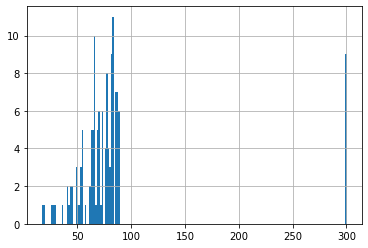

In [20]:

# Visualize distribution of age:
query_output['age'].hist(bins=200)

We know that ages bigger than 89 have been set to 300 for privacy protection.

In [21]:

# 5 number summary all ICU
query_output['age'].describe()

count    136.000000
mean      84.727227
std       59.526746
min       17.192000
25%       63.836575
50%       74.675500
75%       83.199950
max      300.044700
Name: age, dtype: float64

In [22]:

# 5 number summary - CCU
icu_df = query_output[query_output['first_careunit'] == 'CCU']
icu_df['age'].describe()

count     19.000000
mean      81.153068
std       54.856342
min       40.606400
25%       59.851800
50%       73.064700
75%       81.184950
max      300.002600
Name: age, dtype: float64

In [23]:

# 5 number summary - CSRU
icu_df = query_output[query_output['first_careunit'] == 'CSRU']
icu_df['age'].describe()

count     6.000000
mean     78.496400
std       6.423162
min      70.754500
25%      73.265675
50%      79.354650
75%      82.011550
max      87.381400
Name: age, dtype: float64

In [24]:

# 5 number summary - MICU
icu_df = query_output[query_output['first_careunit'] == 'MICU']
icu_df['age'].describe()

count     77.000000
mean      87.760839
std       63.704415
min       27.016700
25%       64.788400
50%       72.679900
75%       83.325200
max      300.044700
Name: age, dtype: float64

In [25]:

# 5 number summary - SICU
icu_df = query_output[query_output['first_careunit'] == 'SICU']
icu_df['age'].describe()

count     23.000000
mean      83.340996
std       48.881057
min       44.106900
25%       63.841500
50%       78.453500
75%       81.537550
max      300.002000
Name: age, dtype: float64

In [26]:

# 5 number summary - TSICU
icu_df = query_output[query_output['first_careunit'] == 'TSICU']
icu_df['age'].describe()

count     11.000000
mean      75.962609
std       78.054324
min       17.192000
25%       39.984000
50%       55.099500
75%       77.582450
max      300.003200
Name: age, dtype: float64